In [62]:
# Import required libraries
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

In [63]:
grid = np.zeros((4,4)) #this is how you define a 4x4 grid
print(grid)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


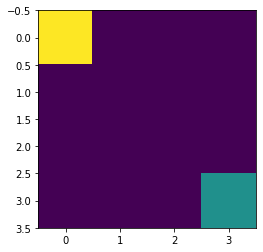

In [64]:
pos1 = [0,0] #start position of our agent
pos2 = [3,3] #goal position of our agent
grid[tuple(pos1)] = 1
grid[tuple(pos2)] = 0.5

plt.imshow(grid)

In [65]:
class GridEnvironment(gym.Env):
    metadata = {'render.modes': []}

    def __init__(self):
        self.observation_space = spaces.Discrete(16)
        self.action_space = spaces.Discrete(4)
        self.max_timesteps = 10
        self.done = Falses

        self.timestep = 0
        self.agent_pos = [0, 0]
        self.goal_pos = [3, 3]
        self.state = np.zeros((4, 4))
        self.state[tuple(self.agent_pos)] = 1  # Initial agent position
        self.state[tuple(self.goal_pos)] = 0.5  # Goal position

        self.rocks = [(1, 1), (2, 2)]  # Rocks positions
        for rock_pos in self.rocks:
            self.state[rock_pos] = -1  # Rocks as negative rewards

        self.rewards = [(0, 3), (3, 0)]  # Positions where the agent receives positive rewards
        for reward_pos in self.rewards:
            self.state[reward_pos] = 2  # Positive rewards at reward positions

    def reset(self, **kwargs):
        self.state = np.zeros((4, 4))
        self.terminated = False
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5

        for rock_pos in self.rocks:
            self.state[rock_pos] = -1  # Rocks as negative rewards

        for reward_pos in self.rewards:
            self.state[reward_pos] = 2

        observation = self.state.flatten()
        return observation

    def step(self, action):
        if action == 0:  # Up
            self.agent_pos[0] = max(0, self.agent_pos[0] - 1)
        elif action == 1:  # Down
            self.agent_pos[0] = min(3, self.agent_pos[0] + 1)
        elif action == 2:  # Right
            self.agent_pos[1] = min(3, self.agent_pos[1] + 1)
        elif action == 3:  # Left
            self.agent_pos[1] = max(0, self.agent_pos[1] - 1)

        self.state = np.zeros((4, 4))
        self.state[tuple(self.agent_pos)] = 1
        self.state[tuple(self.goal_pos)] = 0.5

        for rock_pos in self.rocks:
            self.state[rock_pos] = -1

        for reward_pos in self.rewards:
            self.state[reward_pos] = 2 

        observation = self.state.flatten()

        reward = 0
        if np.array_equal(self.agent_pos, self.goal_pos):
            reward = 10  # Positive reward for reaching the goal
            self.done = True
        elif tuple(self.agent_pos) in self.rocks:
            # Assign individual rewards for each rock position
            if tuple(self.agent_pos) == (1, 1):
                reward = -5  # Negative reward for hitting the rock at (1, 1)
            elif tuple(self.agent_pos) == (2, 2):
                reward = -6  # Negative reward for hitting the rock at (2, 2)
        elif tuple(self.agent_pos) in self.rewards:
            # Assign individual rewards for each reward position
            if tuple(self.agent_pos) == (0, 3):
                reward = 5  # Positive reward for being at the reward position (0, 3)
            elif tuple(self.agent_pos) == (3, 0):
                reward = 6  # Positive reward for being at the reward position (3, 0)

        self.timestep += 1

        terminated = True if self.timestep >= self.max_timesteps else False

        agentState = self.agent_pos
        isDone = self.done
        timestepCount = self.timestep

        return observation, reward, terminated, agentState, isDone, timestepCount

    def render(self):
        plt.title('Grid World')

        # Visualize rocks as red squares
        for rock_pos in self.rocks:
            plt.scatter(rock_pos[1], rock_pos[0], color='red', marker='s', s=300)

        # Visualize rocks as red squares
        for reward_pos in self.rewards:
            plt.scatter(reward_pos[1], reward_pos[0], color='orange', marker='P', s=300)

        # Visualize the agent as a green circle
        plt.scatter(self.agent_pos[1], self.agent_pos[0], color='green', marker='o', s=300)

        # Visualize the goal as a blue star
        plt.scatter(self.goal_pos[1], self.goal_pos[0], color='blue', marker='*', s=300)
        plt.imshow(self.state)
        plt.show()
        


In [66]:
actionsEquivalent = {0:'Up', 1:'Down', 2:'Right', 3:'Left'}
statesEquivalent = {(0,0):'S1', (0,1):'S2', (0,2):'S3', (0,3):'S4', (1,0):'S5', (1,1):'S6', (1,2):'S7', 
                    (1,3):'S8',(2,0):'S9',(2,1):'S10',(2,2):'S11', (2,3):'S12', (3,0):'S13', (3,1):'S14', 
                    (3,2):'S15', (3,3):'S16'}

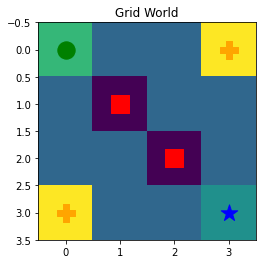

In [67]:
env = GridEnvironment()

obs = env.reset()
env.render()

Reward = 0, Action = Down, Current State = S5 = (1, 0)


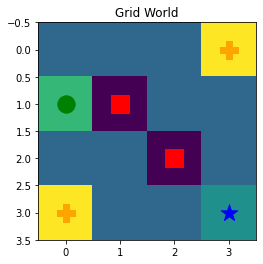

In [68]:
action = 1
observation, reward, terminated, state, done, timestepCount = env.step(action)
print(f"Reward = {reward}, Action = {actionsEquivalent[action]}, Current State = {statesEquivalent[tuple(state)]} = {tuple(state)}")
env.render()

Reward = -5, Action = Right, Current State = S6 = (1, 1)


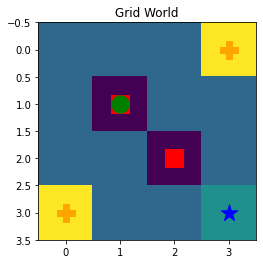

In [69]:
action = 2
observation, reward, terminated, state, done, timestepCount = env.step(action)
print(f"Reward = {reward}, Action = {actionsEquivalent[action]}, Current State = {statesEquivalent[tuple(state)]} = {tuple(state)}")
env.render()

Reward = 0, Action = Left, Current State = S5 = (1, 0)


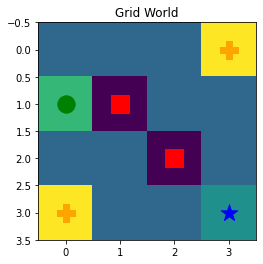

In [70]:
action = 3
observation, reward, terminated, state, done, timestepCount = env.step(action)
print(f"Reward = {reward}, Action = {actionsEquivalent[action]}, Current State = {statesEquivalent[tuple(state)]} = {tuple(state)}")
env.render()

In [71]:
# Definition an agent that takes action randomly
class RandomAgent:

  def __init__(self, env):
    self.env = env
    self.observation_space = env.observation_space
    self.action_space = env.action_space

  def step(self, obs):
    """Takes a step in the environment by choosing an action randomly.

    Args:
        obs: The current observation.

    Returns:
        The action to take.
    """
    return np.random.choice(self.action_space.n)

Timestep: 1

Current State: S1 = (0, 0) | Action = Up | Reward = 0 | Done = False | Terminated:False


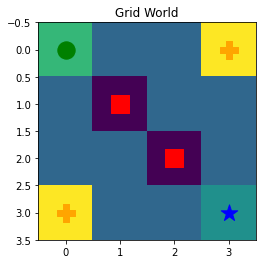

Timestep: 2

Current State: S1 = (0, 0) | Action = Left | Reward = 0 | Done = False | Terminated:False


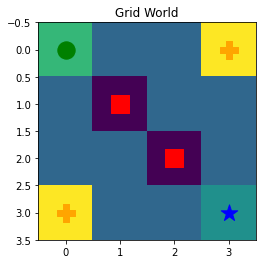

Timestep: 3

Current State: S2 = (0, 1) | Action = Right | Reward = 0 | Done = False | Terminated:False


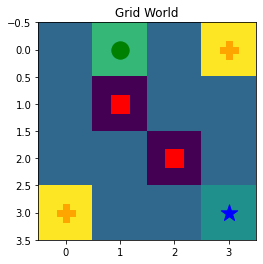

Timestep: 4

Current State: S1 = (0, 0) | Action = Left | Reward = 0 | Done = False | Terminated:False


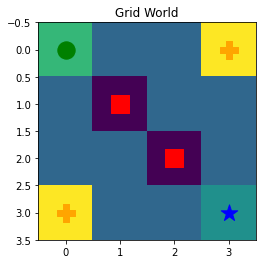

Timestep: 5

Current State: S5 = (1, 0) | Action = Down | Reward = 0 | Done = False | Terminated:False


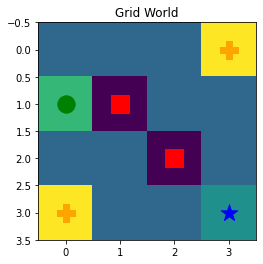

Timestep: 6

Current State: S1 = (0, 0) | Action = Up | Reward = 0 | Done = False | Terminated:False


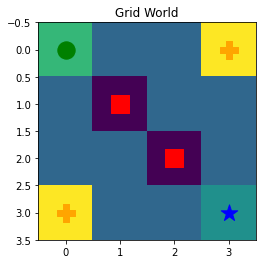

Timestep: 7

Current State: S2 = (0, 1) | Action = Right | Reward = 0 | Done = False | Terminated:False


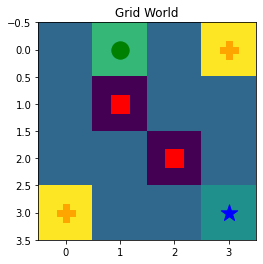

Timestep: 8

Current State: S6 = (1, 1) | Action = Down | Reward = -5 | Done = False | Terminated:False


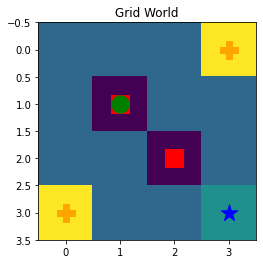

Timestep: 9

Current State: S5 = (1, 0) | Action = Left | Reward = 0 | Done = False | Terminated:False


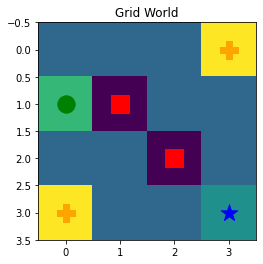

Timestep: 10

Current State: S6 = (1, 1) | Action = Right | Reward = -5 | Done = False | Terminated:True


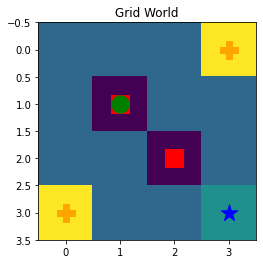

In [72]:
# Sample code for environment and agent implementation. Also shows
# visualization of the random agent's movement across the grid. The yellow cell
# shows the movement of the agent.

if __name__ == '__main__':
  env = GridEnvironment()
  agent = RandomAgent(env)

  obs = env.reset()

  while not terminated:
    action = agent.step(obs)
    observation, reward, terminated, state, done, timestepCount = env.step(action)
    stateTup = tuple(state)
    print(f"Timestep: {timestepCount}")
    print(f"\nCurrent State: {statesEquivalent[stateTup]} = {stateTup} | Action = {actionsEquivalent[action]} | Reward = {reward} | Done = {done} | Terminated:{terminated}")
    env.render()

In [99]:

# SARSA algorithm for OpenAI Gym environment
def sarsa(env, num_episodes, alpha, gamma, epsilon):
    # Initialize Q-values
    action_space_size = env.action_space.n
    state_space_size = env.observation_space.n
    Q = np.zeros((state_space_size, action_space_size))
    
    # Epsilon-greedy policy
    def epsilon_greedy_policy(Q, state, epsilon):
        if np.random.rand() < epsilon:
            # Exploration: choose a random action
            return np.random.choice(action_space_size)
        else:
            # Exploitation: choose the action with the highest Q-value
            return np.argmax(Q[state, :])

    for episode in range(num_episodes):
        state = env.reset()
        action = epsilon_greedy_policy(Q, state, epsilon)

        while True:
            # Take the chosen action
            _, reward, _, next_state, done, _ = env.step(action)

            # Choose the next action using epsilon-greedy policy
            next_action = epsilon_greedy_policy(Q, next_state, epsilon)

            # Update Q-value using SARSA update rule
            Q[state, action] += alpha * (
                reward + gamma * Q[next_state, next_action] - Q[state, action]
            )

            state = next_state
            action = next_action

            if done:
                break

    return Q



# Gym environment
env = GridEnvironment()

# SARSA parameters
num_episodes = 1000
alpha = 0.1
gamma = 0.99
epsilon = 0.1

# Run SARSA algorithm
Q_values = sarsa(env, num_episodes, alpha, gamma, epsilon)

# Print the learned Q-values
print("Learned Q-values:")
print(Q_values)


IndexError: arrays used as indices must be of integer (or boolean) type